# DB[RC/S3]
Density-Based Residue Clustering by Dissimilarity Between Sequence SubSets)
#
## Transthyretins/Hydroxy-isourate Hydrolases

In [1]:
from protlearn import *
from sklearn.ensemble import RandomForestRegressor

In [2]:
###====================================================================================================
### Parameters
###====================================================================================================

class Args(object):
    def __init__(self) -> None:
        self.__getattr__ = None
args = Args()
args.file = 'sample.fasta'
args.expand_alphabet = False
args.min_freq = .1
args.max_dist = 1.
args.min_size = 3
args.out = None

if args.out is None:
    args.out = 'output/' + args.file.split('.')[0]

In [3]:
# #====================================================================================================
msa = MSA(args.file, args.expand_alphabet)

In [4]:
data = pd.DataFrame(msa.sequences)

# Calculate the proportion of "-" values weighted by row weight
gap_ratio = (data == '-').mul(msa.weights, axis=0).sum()

# Filter the columns based on the condition that "-" is present in more than 90% of the rows
selected_columns = gap_ratio.index[(gap_ratio < args.min_freq)]

# Select only the columns corresponding to the selected features
df_selected = data[selected_columns]
df_selected

,61,62,63,64,65,66,67,68,69,70,...,161,162,163,169,170,177,218,219,220,221
0,E,S,D,T,H,C,P,L,M,V,...,A,H,A,E,G,H,T,A,V,V
1,A,-,A,P,Y,S,P,L,T,T,...,I,T,D,F,H,R,Y,R,G,S
2,S,V,D,S,K,C,P,L,M,V,...,A,N,D,Y,T,P,T,A,V,V
3,T,G,E,S,K,C,P,L,M,V,...,A,N,D,Y,-,-,T,A,V,V
4,M,S,G,S,P,S,P,L,T,T,...,I,T,D,Y,H,R,Y,R,G,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,D,H,H,T,R,C,P,V,L,I,...,V,A,S,Y,T,P,T,G,I,I
125,D,H,D,T,R,C,P,I,L,I,...,V,A,S,Y,T,P,T,G,I,V
126,-,-,-,-,-,C,A,L,M,V,...,G,S,K,L,G,-,T,A,V,V
127,E,T,D,S,K,C,P,L,M,V,...,A,N,N,A,G,-,T,A,V,V


In [5]:
"""
Attention!!! This snippet is specific for this particular example so it must be adapted to
each particular case.
"""
target = []
for i in msa.headers:
    print(i)
    if 'HIUase' in i:
        target.append(0.)
    elif 'TTR' in i:
        target.append(1.)
    else:
        print("Neither HIUase nor TTR")
        target.append(.5)
target

A0A060XNK3_TTR_Protacanthopterygii_1-149
A0A060YEF5_HIUase_Salmoninae_1-146
A0A087VEU0_TTR_Neognathae_1-150
A0A087WV45_TTR_Homo_sapiens_1-139
A0A087YIQ9_HIUase_Poeciliinae_1-139
A0A091EAT2_TTR_Corvus_brachyrhynchos_1-147
A0A091K3M6_TTR_Colius_striatus_1-147
A0A091MXB0_HIUase_Acanthisitta_chloris_1-115
A0A091NPE2_TTR_Acanthisitta_chloris_1-147
A0A091QPR5_TTR_Merops_nubicus_1-147
A0A093C1Y4_TTR_Tauraco_erythrolophus_1-150
A0A093G7W0_TTR_Picoides_pubescens_1-147
A0A093I1I2_TTR_Struthio_camelus_australis_1-147
A0A093J0L4_TTR_Neognathae_1-147
A0A093J8Y7_TTR_Neognathae_1-150
A0A093QJG9_TTR_Manacus_vitellinus_1-148
A0A0A0AHZ1_TTR_Charadrius_vociferus_1-147
A0A0C4K440_TTR_Rhinolophus_affinis_1-145
A0A0E9XKA0_HIUase_Anguilla_anguilla_1-140
A0A0E9XUW7_TTR_Anguilla_anguilla_1-150
A0A0F8AW96_TTR_Larimichthys_crocea_1-152
A0A0P7T9L7_HIUase_Scleropages_formosus_1-119
A0A0P7Y1C5_TTR_Scleropages_formosus_1-151
A0A0Q3UQK9_TTR_Amazona_aestiva_1-150
A0A0R4IP91_TTR_Danio_rerio_1-151
A0A0U2DWF5_TTR_Plecogl

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [6]:
df_target = pd.DataFrame(target, columns=['Target'])
df_target

,Target
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
124,1.0
125,1.0
126,1.0
127,1.0


In [7]:
df_chars = pd.concat([df_selected, df_target], axis=1).sort_values(by='Target')
df_chars

,61,62,63,64,65,66,67,68,69,70,...,162,163,169,170,177,218,219,220,221,Target
39,S,A,A,S,V,S,Q,L,T,T,...,T,D,Y,H,P,Y,R,G,S,0.0
37,S,A,S,D,I,S,P,L,S,T,...,T,D,L,H,R,Y,R,G,S,0.0
38,M,E,P,V,S,S,P,L,T,T,...,T,N,F,H,P,Y,R,G,S,0.0
78,M,E,P,E,S,S,P,L,T,T,...,T,K,F,H,P,Y,R,G,S,0.0
40,M,E,P,T,A,S,P,L,T,T,...,T,S,F,H,P,Y,R,G,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,T,S,G,P,K,C,P,L,M,V,...,N,D,Y,T,P,T,A,L,V,1.0
34,G,S,D,A,H,C,P,L,T,V,...,H,A,E,G,H,T,A,V,V,1.0
33,G,S,D,A,H,C,P,L,T,V,...,-,-,-,-,-,-,-,-,-,1.0
80,S,V,D,S,K,C,P,L,M,V,...,N,D,Y,T,P,T,A,V,V,1.0


In [8]:
def target_mean(df, by, on):
    means = df.groupby(by)[on].mean()
    return df[by].map(means)

In [9]:
df_num = df_chars.copy()
for col in df_num.columns:
    df_num[col] = target_mean(df_num, by=col, on='Target')
df_num

,61,62,63,64,65,66,67,68,69,70,...,162,163,169,170,177,218,219,220,221,Target
39,0.696970,0.500000,0.0000,0.872727,0.000000,0.000000,0.000000,0.614754,0.113208,0.0,...,0.026316,0.695122,0.835616,0.020408,0.65625,0.0,0.021277,0.021277,0.021739,0.0
37,0.696970,0.500000,0.0000,0.750000,0.000000,0.000000,0.669492,0.614754,0.500000,0.0,...,0.026316,0.695122,0.111111,0.020408,0.00000,0.0,0.021277,0.021277,0.021739,0.0
38,0.000000,0.153846,0.0625,0.100000,0.142857,0.000000,0.669492,0.614754,0.113208,0.0,...,0.026316,0.142857,0.040000,0.020408,0.65625,0.0,0.021277,0.021277,0.021739,0.0
78,0.000000,0.153846,0.0625,0.000000,0.142857,0.000000,0.669492,0.614754,0.113208,0.0,...,0.026316,0.333333,0.040000,0.020408,0.65625,0.0,0.021277,0.021277,0.021739,0.0
40,0.000000,0.153846,0.0625,0.714286,0.000000,0.000000,0.669492,0.614754,0.113208,0.0,...,0.026316,0.500000,0.040000,0.020408,0.65625,0.0,0.021277,0.021277,0.021739,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.947368,0.761905,0.4000,0.357143,1.000000,0.985507,0.669492,0.614754,1.000000,1.0,...,0.935484,0.695122,0.835616,1.000000,0.65625,1.0,1.000000,1.000000,1.000000,1.0
34,1.000000,0.761905,1.0000,0.777778,1.000000,0.985507,0.669492,0.614754,0.113208,1.0,...,0.928571,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,1.0
33,1.000000,0.761905,1.0000,0.777778,1.000000,0.985507,0.669492,0.614754,0.113208,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,1.0
80,0.696970,1.000000,1.0000,0.872727,1.000000,0.985507,0.669492,0.614754,1.000000,1.0,...,0.935484,0.695122,0.835616,1.000000,0.65625,1.0,1.000000,1.000000,1.000000,1.0


In [10]:
# Split the dataset into features (X) and target (y)
X = df_num.drop('Target', axis=1)
y = df_num['Target']

# Fit a random forest model to the data
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)

# Get the feature importances and sort them in descending order
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Calculate the cumulative sum of the importance values
cumulative_importance = importances.cumsum()
cumulative_importance

218    0.19
116    0.35
151    0.49
70     0.62
117    0.75
       ... 
99     1.00
96     1.00
95     1.00
90     1.00
221    1.00
Length: 100, dtype: float64

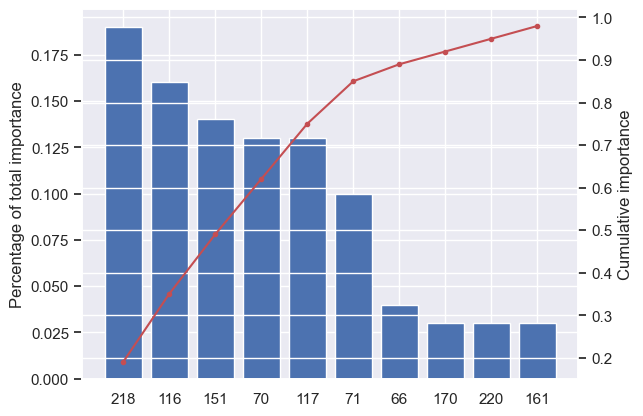

In [11]:
# Filter the feature importances to keep only those that contribute to 99% of the importance
most_important = importances[cumulative_importance <= 0.99].sort_values(ascending=False)
selected_features = importances[cumulative_importance <= 0.99].index
higher_importance = cumulative_importance[selected_features]

fig, ax1 = plt.subplots()

# Bar chart of percentage importance
xvalues = range(len(most_important))
ax1.bar(xvalues, most_important, color='b')
ax1.set_ylabel('Percentage of total importance')
ax1.tick_params(axis='y')

# Line chart of cumulative percentage importance
ax2 = ax1.twinx()
ax2.plot(xvalues, higher_importance, color='r', marker='.')
ax2.set_ylabel('Cumulative importance')
ax2.tick_params(axis='y')

# Rotate x-axis labels
plt.xticks(xvalues, most_important.index, rotation=90)

plt.show()

In [12]:
# Select only the columns corresponding to the selected features
df_selected = df_num[selected_features]
df_selected

,218,116,151,70,117,71,66,170,220,161
39,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020408,0.021277,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020408,0.021277,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020408,0.021277,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020408,0.021277,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020408,0.021277,0.0
...,...,...,...,...,...,...,...,...,...,...
36,1.0,1.0,1.0,1.0,1.0,1.0,0.985507,1.000000,1.000000,1.0
34,1.0,1.0,1.0,1.0,1.0,1.0,0.985507,1.000000,1.000000,1.0
33,1.0,1.0,1.0,1.0,1.0,1.0,0.985507,1.000000,1.000000,1.0
80,1.0,1.0,1.0,1.0,1.0,1.0,0.985507,1.000000,1.000000,1.0


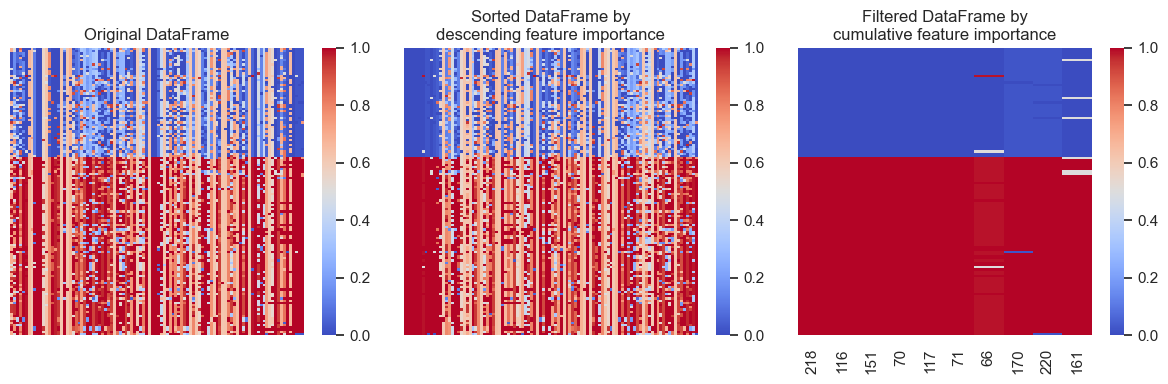

In [28]:
_, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the original DataFrame
sns.heatmap(X, cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('Original DataFrame')

# Plot the sorted DataFrame
sns.heatmap(X[importances.index], cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Sorted DataFrame by\ndescending feature importance')

# Plot the filtered DataFrame
sns.heatmap(df_selected, cmap='coolwarm', yticklabels=False, ax=axs[2])
axs[2].set_title('Filtered DataFrame by\ncumulative feature importance')

plt.tight_layout()
plt.show()

In [14]:
# #====================================================================================================
R = []
for col in most_important.index:
    R += msa.collection[col]

In [15]:
# #====================================================================================================
G = nx.Graph()
for i, a in enumerate(R[:-1]):
    if a.p() >= args.min_freq:
        for b in R[i + 1:]:
            if b.p() >= args.min_freq:
                G.add_edge(
                    a,
                    b,
                    weight = float(
                        sum(
                            map(lambda x: msa.weights[x], a.sequence_indices ^ b.sequence_indices)
                        )
                    ) / float(
                        sum(
                            map(lambda x: msa.weights[x], a.sequence_indices | b.sequence_indices)
                        )
                    )
                )
# #====================================================================================================
N = sorted(G.nodes(), key=lambda x: x.p(), reverse=True)
for n in N:
    print(n)
# #====================================================================================================
D = nx.to_numpy_array(G, nodelist=N)
D

Lys
Glu
Cys
Thr
Glu
Val
Ala
Gly
Val
His
Pro
Thr
Thr
Tyr
Ile
Cys
His
Arg
Leu
Ser
Gly
Val
Ile
Ile
Ile
Val


array([[0.        , 0.02400009, 0.09502006, 0.21327388, 0.2026758 ,
        0.25819646, 0.3761192 , 0.92407061, 0.48740383, 0.97950058,
        1.        , 1.        , 0.49128589, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.59902058, 1.        ,
        0.69935621, 0.70056645, 0.75194834, 0.78498357, 0.79172945,
        0.84251275],
       [0.02400009, 0.        , 0.07305665, 0.23695018, 0.18306939,
        0.26703623, 0.3997955 , 0.92281472, 0.51108013, 0.97916646,
        1.        , 1.        , 0.49164553, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.62269688, 1.        ,
        0.6919633 , 0.6932033 , 0.75690213, 0.77969626, 0.78660802,
        0.83876541],
       [0.09502006, 0.07305665, 0.        , 0.27667258, 0.14225004,
        0.25646377, 0.46514728, 0.91025421, 0.57503355, 0.96916328,
        0.99097086, 0.99097086, 0.47782858, 0.99079737, 0.99075975,
        0.99074337, 0.99073874, 0.99049164, 0.65707815, 1.        ,
      

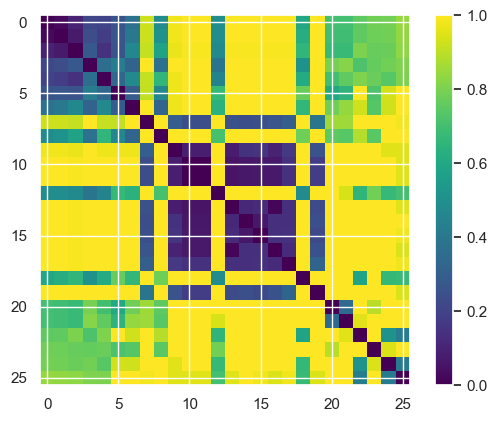

In [16]:
# Plot the distance matrix
fig, ax = plt.subplots()
im = ax.imshow(D, cmap='viridis')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

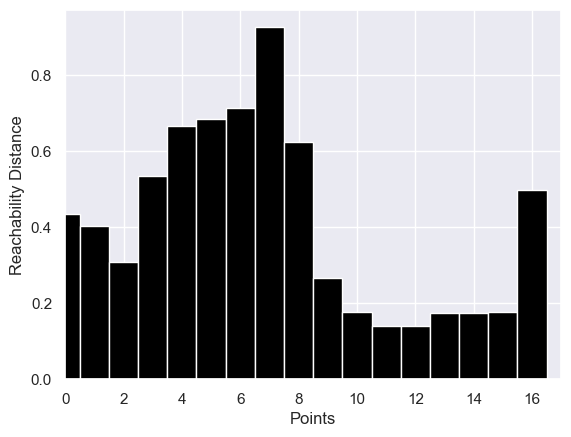

In [31]:
# #====================================================================================================
optics_instance = optics(D, args.max_dist, args.min_size, None, 'distance_matrix')
optics_instance.process()
clusters = optics_instance.get_clusters()
# #====================================================================================================
ordering = ordering_analyser(optics_instance.get_ordering())
ordering = ordering.cluster_ordering
plt.figure()
plt.bar(range(0, len(ordering)), ordering[0:len(ordering)], width=1., color='black')
plt.xlim([0, len(ordering)])
plt.xlabel('Points')
plt.ylabel('Reachability Distance')
plt.savefig('%s_reachability_plot.png' % args.out)

In [18]:
# #====================================================================================================
clusters = sorted(clusters, key=lambda x: mean(list(map(lambda y: N[y].p(), x))), reverse=True)
i = 0
while i < len(clusters):
    positions = set(map(lambda x: N[x].position, clusters[i]))
    same_position = {k: [] for k in positions}
    for j in clusters[i]:
        same_position[N[j].position].append(j)
    temp = []
    c = Subset(msa, list(set.union(*map(lambda x: set(N[x].sequence_indices), clusters[i]))))
    for j in clusters[i]:
        if j == max(same_position[N[j].position], key=lambda x: N[x].p.given(c)):
            temp.append(j)
    if len(temp) >= args.min_size:
        clusters[i] = temp
        i += 1
    else:
        del clusters[i]
clusters

[[0, 1, 2, 4, 3, 5, 6, 8, 12], [7, 17, 16, 13, 11, 10, 15, 14, 9, 19]]

In [19]:
# #====================================================================================================
with open('%s_clusters.csv' % args.out, 'w') as outfile:
    for i in range(len(clusters)):
        outfile.write('Cluster %d\n' % (i + 1))
        d = {'MSA\nColumn': [], 'Feature': [], 'Frequency': []}
        for j in sorted(clusters[i], key=lambda x: N[x].position):
            d['MSA\nColumn'].append(N[j].position + 1)
            d['Feature'].append(N[j])
            d['Frequency'].append('%.2f' % round(N[j].p(), 2))
        df = pd.DataFrame(d)
        outfile.write(df.to_csv(index=False))
        outfile.write('\n')

In [20]:
# #====================================================================================================
H = []
for i in range(msa.size):
    row = []
    for j in range(len(clusters)):
        count = 0
        for k in clusters[j]:
            if i in N[k].sequence_indices:
                count += 1
        row.append(float(count) / float(len(clusters[j])))
    H.append(row)
H = array(H)
H

array([[0.88888889, 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.88888889, 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.        ],
       [0.44444444, 0.        ],
       [0.        , 0.9       ],
       [0.44444444, 0.        ],
       [0.55555556, 0.        ],
       [0.77777778, 0.        ],
       [0.55555556, 0.        ],
       [0.77777778, 0.        ],
       [0.55555556, 0.        ],
       [1.        , 0.        ],
       [0.44444444, 0.        ],
       [0.44444444, 0.        ],
       [0.88888889, 0.        ],
       [0.        , 1.        ],
       [0.88888889, 0.        ],
       [0.88888889, 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.77777778, 0.        ],
       [0.88888889, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.9       ],
       [0.66666667, 0.1       ],
       [1.        , 0.        ],
       [1.

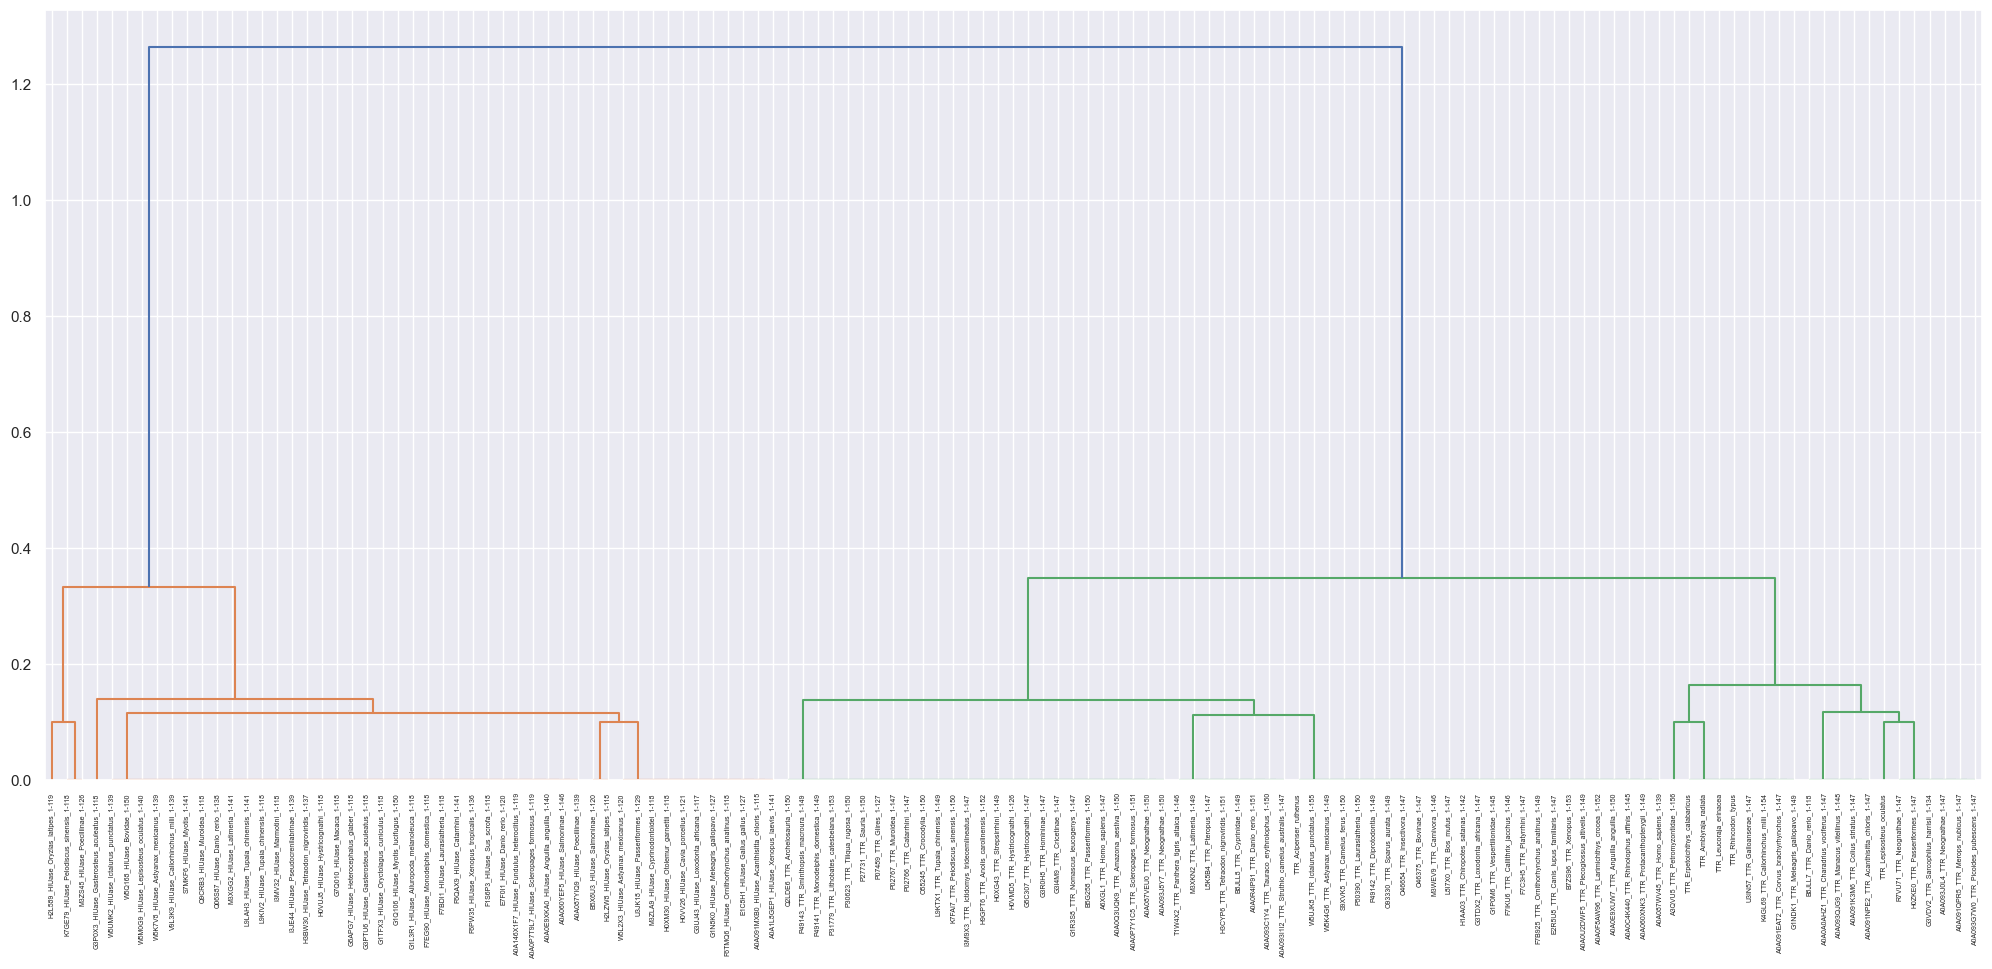

In [21]:
# #====================================================================================================
Z = linkage(H, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=array(msa.headers))
plt.savefig('%s_dendrogram.png' % args.out)
tree = to_tree(Z, False)
with open('%s_dendrogram.nwk' % args.out, 'w') as outfile:
    outfile.write(get_newick(tree, "", tree.dist, msa.headers))

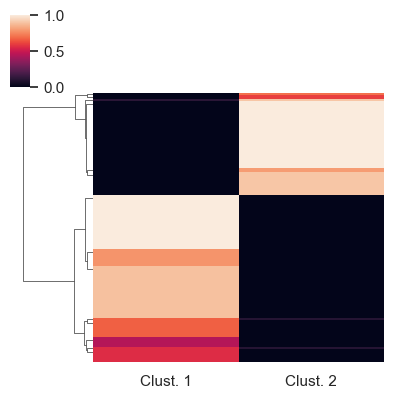

In [32]:
# #====================================================================================================
df = get_df(H, msa, range(msa.size), range(len(clusters)))
seq = df.pop('Seq. ID')
try:
    g = sns.clustermap(df, col_cluster=False, yticklabels=False, figsize=(4,4))
except SystemExit:
    raise 'Warning: few clusters to draw a heatmap!'
row_idx = g.dendrogram_row.reordered_ind
# col_idx = g.dendrogram_col.reordered_ind
col_idx = range(len(clusters))  # Keep column index without dendrogram
H = [H[i] for i in row_idx]
H = array(H)
df = get_df(H, msa, row_idx, col_idx)
df.to_csv('%s_seq_adhesion.csv' % args.out)
plt.savefig('%s_seq_adhesion.png' % args.out)

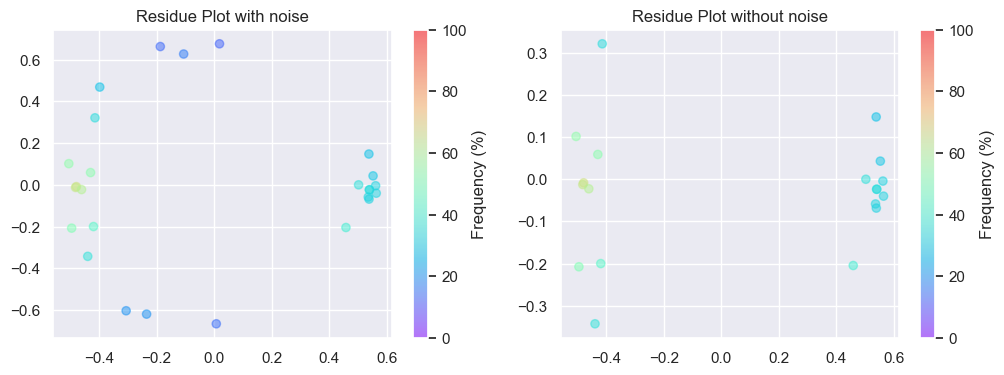

In [23]:
# #====================================================================================================
# # Optional viewing
# #====================================================================================================
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", normalized_stress='auto')
pts = mds.fit(D).embedding_
clf = PCA(n_components=2)
pts = clf.fit_transform(pts)
# #====================================================================================================
colors = array(list(map(lambda x: x.p(), N))) * 100
_, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Residue Plot with noise
X_full, Y_full = zip(*pts)
sc = axs[0].scatter(X_full, Y_full, c=colors, cmap='rainbow', vmin=0., vmax=100., alpha=.5)
cb = plt.colorbar(sc, ax=axs[0])
cb.set_label('Frequency (%s)' % '%')
axs[0].set_title('Residue Plot with noise')

# #====================================================================================================
# Plot 2: Residue Plot without noise
noise = optics_instance.get_noise()
points, colors = [], []
for i, (p, c) in enumerate(zip(pts, list(map(lambda x: x.p(), N)))):
    if i not in noise:
        points.append(p)
        colors.append(c)
colors = array(colors) * 100
X_clean, Y_clean = zip(*points)
sc = axs[1].scatter(X_clean, Y_clean, c=colors, cmap='rainbow', vmin=0., vmax=100., alpha=0.5)
cb = plt.colorbar(sc, ax=axs[1])
cb.set_label('Frequency (%s)' % '%')
axs[1].set_title('Residue Plot without noise')

plt.savefig('%s_residue_plot_combined.png' % args.out)


In [24]:
# #====================================================================================================
# # END
# #====================================================================================================